<a href="https://colab.research.google.com/github/usrmaia/Pandas-Introducao/blob/main/An%C3%A1lise_explorat%C3%B3ria_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Introdução ao Pandas/datasets/AdventureWorks.xlsx")

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,0 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,0 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,0 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,0 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,0 days


df.sample(10)

In [ ]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Calcular a receita total
df["Valor Venda"].sum()

5984606.1426

In [ ]:
# Custo total
df["Custo Total"] = df["Custo Unitário"].mul(df["Quantidade"])

In [ ]:
round(df["Custo Total"].sum(), 2)

2486783.05

In [ ]:
df["Lucro"] = df["Valor Venda"] - df["Custo Total"]

In [ ]:
# Lucro total
round(df["Lucro"].sum(), 2)

3497823.09

In [ ]:
df["Tempo de Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
# Tempo de envio médio para cada marca
df.groupby("Marca")["Tempo de Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo de Envio, dtype: float64

In [ ]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro             0
Tempo de Envio    0
dtype: int64

In [ ]:
# Lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, df["Marca"]])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
pd.options.display.float_format = "{:20,.2f}".format

In [ ]:
lucro_por_ano = df.groupby([df["Data Venda"].dt.year, df["Marca"]])["Lucro"].sum().reset_index()
lucro_por_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produtos')

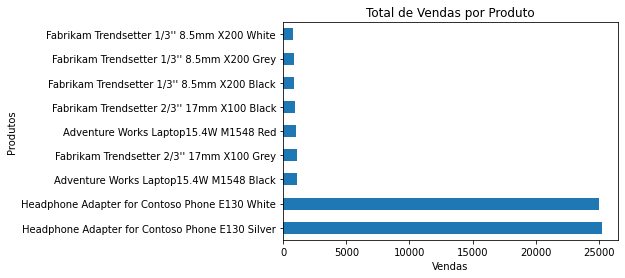

In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total de Vendas por Produto")
plt.xlabel("Vendas")
plt.ylabel("Produtos")

In [ ]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

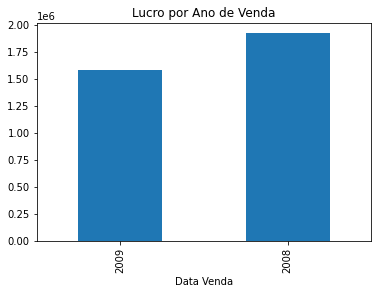

In [ ]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().sort_values().plot.bar(title="Lucro por Ano de Venda")
# plt.xlabel("Anos")
# plt.ylabel("Vendas")

In [ ]:
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


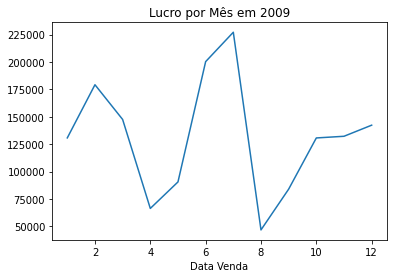

In [ ]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro por Mês em 2009")
plt.xlabel = "Mês"
plt.ylabel = "Lucro"

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

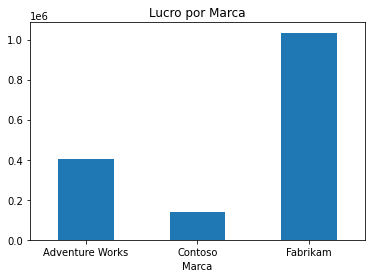

In [ ]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro por Marca")
plt.xlabel = "Marca"
plt.ylabel = "Lucro"
plt.xticks(rotation="horizontal")

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

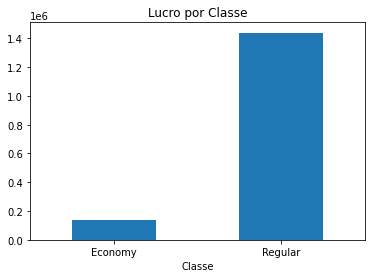

In [ ]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro por Classe")
plt.xlabel = "Classe"
plt.ylabel = "Lucro"
plt.xticks(rotation="horizontal")

In [ ]:
df["Tempo de Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc0e557e110>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc0e557eb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc0e5577b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0e5584690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0e5584bd0>],
 'means': []}

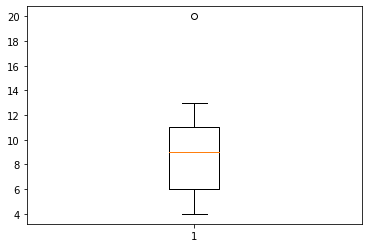

In [ ]:
plt.boxplot(df["Tempo de Envio"])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <a list of 10 Patch objects>)

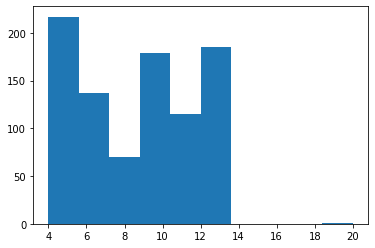

In [ ]:
plt.hist(df["Tempo de Envio"])